Se simplifica el modelo en este caso a costa de perder algo de exactitud. Tener en cuenta que algunas caracteristicas no logran buena clasificación y formaran parte de PCA.  

In [7]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import KernelPCA
from sklearn.tree import DecisionTreeClassifier

In [8]:
df = sns.load_dataset("penguins")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df = df.dropna()
df = df.drop(["island", "sex"], axis = 1)

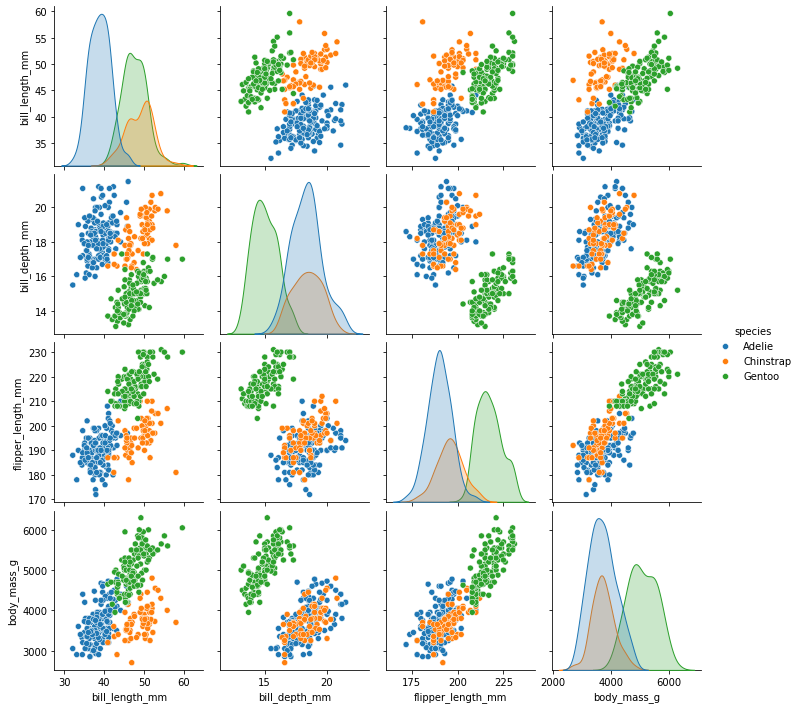

In [10]:
sns.pairplot(df, hue="species")

In [11]:
X = df.drop(['species'], axis = 1) 
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Probemos la calidad general del modelo
cls = DecisionTreeClassifier(max_depth=3)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        31
   Chinstrap       1.00      0.92      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)
pca = PCA(n_components=4)
pca.fit(X_test_scl)



PCA(n_components=4)

Los dos componentes principales explican el 88% de la variabilidad

In [13]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:2].sum())


[0.67007949 0.18697569 0.1205106  0.02243422]
0.8570551801152391


([<matplotlib.axis.XTick at 0x165078e4dc0>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

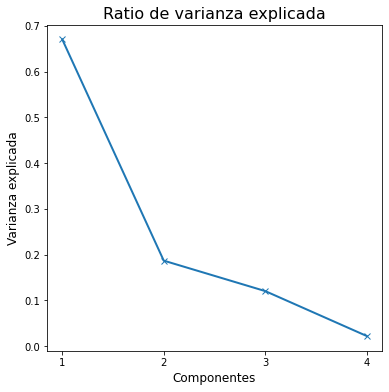

In [14]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(pca.explained_variance_ratio_,'x-',linewidth=2)
ax.set_xlabel('Componentes', fontsize = 12)
ax.set_ylabel('Varianza explicada', fontsize = 12)
ax.set_title('Ratio de varianza explicada', fontsize = 16)
n = len(pca.explained_variance_ratio_)
plt.xticks(np.arange(n), np.arange(1, n+1))

In [15]:
X_train_scl

array([[-0.59372706, -1.75093934,  0.9359428 ,  0.53973681],
       [-1.26104283,  0.32310698, -0.719956  , -1.07236416],
       [ 1.09309891, -0.63803644,  1.65589881,  1.40779118],
       ...,
       [-0.81616565,  0.27252048, -0.5759648 , -1.25837581],
       [ 0.2589542 , -1.0933149 ,  1.36791641,  0.97376399],
       [-1.11275044, -0.08158499, -1.43991201, -1.28937775]])

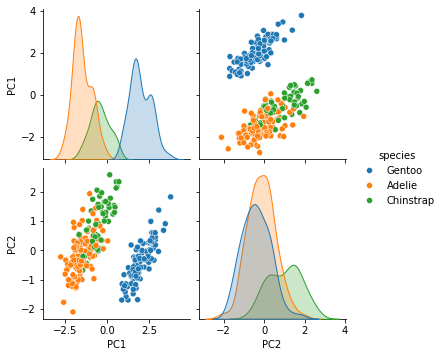

In [16]:
pca = PCA(n_components=4)
pca.fit(X_train_scl)
X_train_pca = pca.fit_transform(X_train_scl)[:, :2]
X_test_pca = pca.transform(X_test_scl)[:, :2]
df_4_2 = pd.DataFrame(data=X_train_pca, columns = ['PC1', 'PC2'])
df_4_2["species"] = y_train.values
sns.pairplot(df_4_2, hue = "species")

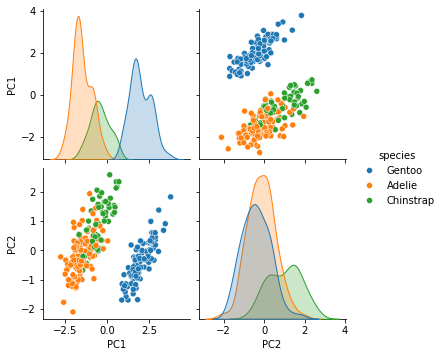

In [17]:
pca = PCA(n_components=2)
pca.fit(X_train_scl)
X_train_pca = pca.fit_transform(X_train_scl)
X_test_pca = pca.transform(X_test_scl)[:, :2]
df_2 = pd.DataFrame(data=X_train_pca, columns = ['PC1', 'PC2'])
df_2["species"] = y_train.values
sns.pairplot(df_2, hue = "species")

In [18]:
# Probemos la calidad general del modelo
cls = DecisionTreeClassifier(max_depth=3)
cls.fit(X_train_pca, y_train)
y_pred = cls.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.84      1.00      0.91        31
   Chinstrap       1.00      0.62      0.76        13
      Gentoo       1.00      0.96      0.98        23

    accuracy                           0.91        67
   macro avg       0.95      0.86      0.88        67
weighted avg       0.92      0.91      0.91        67



Kernel PCA? 

In [19]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_train_k_PCA = kpca.fit_transform(X_train_scl)
X_test_k_PCA = kpca.transform(X_test_scl)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_k_PCA, y_train)

y_pred = clf.predict(X_test_k_PCA)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.74      0.45      0.56        31
   Chinstrap       0.00      0.00      0.00        13
      Gentoo       0.48      1.00      0.65        23

    accuracy                           0.55        67
   macro avg       0.41      0.48      0.40        67
weighted avg       0.51      0.55      0.48        67



c:\Users\pabli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pabli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pabli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo